In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from svm_margin_plot import plot_svm_boundary
from sklearn.metrics import accuracy_score

In [2]:
# load data
data=pd.read_csv("C:\\Users\\CEC\\Downloads\\credit_customers (1).csv")
data

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,<0,6,critical/other existing credit,radio/tv,1169,no known savings,>=7,4,male single,none,...,real estate,67,none,own,2,skilled,1,yes,yes,good
1,0<=X<200,48,existing paid,radio/tv,5951,<100,1<=X<4,2,female div/dep/mar,none,...,real estate,22,none,own,1,skilled,1,none,yes,bad
2,no checking,12,critical/other existing credit,education,2096,<100,4<=X<7,2,male single,none,...,real estate,49,none,own,1,unskilled resident,2,none,yes,good
3,<0,42,existing paid,furniture/equipment,7882,<100,4<=X<7,2,male single,guarantor,...,life insurance,45,none,for free,1,skilled,2,none,yes,good
4,<0,24,delayed previously,new car,4870,<100,1<=X<4,3,male single,none,...,no known property,53,none,for free,2,skilled,2,none,yes,bad
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,no checking,12,existing paid,NaN,1736,<100,4<=X<7,3,female div/dep/mar,none,...,real estate,31,none,own,1,unskilled resident,1,none,yes,good
996,<0,30,existing paid,used car,3857,<100,1<=X<4,4,male div/sep,none,...,life insurance,40,none,own,1,high qualif/self emp/mgmt,1,yes,yes,good
997,no checking,12,existing paid,radio/tv,804,<100,>=7,4,male single,none,...,car,38,none,own,1,skilled,1,none,yes,good
998,<0,45,existing paid,radio/tv,1845,<100,1<=X<4,4,male single,none,...,no known property,23,none,for free,1,skilled,1,yes,yes,bad


In [3]:
# EDA
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   checking_status         909 non-null    object
 1   duration                1000 non-null   int64 
 2   credit_history          961 non-null    object
 3   purpose                 957 non-null    object
 4   credit_amount           1000 non-null   int64 
 5   savings_status          987 non-null    object
 6   employment              987 non-null    object
 7   installment_commitment  1000 non-null   int64 
 8   personal_status         1000 non-null   object
 9   other_parties           1000 non-null   object
 10  residence_since         1000 non-null   int64 
 11  property_magnitude      942 non-null    object
 12  age                     1000 non-null   int64 
 13  other_payment_plans     1000 non-null   object
 14  housing                 931 non-null    object
 15  exist

In [4]:
data.describe()

,duration,credit_amount,installment_commitment,residence_since,age,existing_credits,num_dependents
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000
std,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000
25%,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000
50%,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000
75%,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000
max,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000


C:\Users\CEC\AppData\Local\Temp\ipykernel_15232\1529804345.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  data.hist(ax=ax)


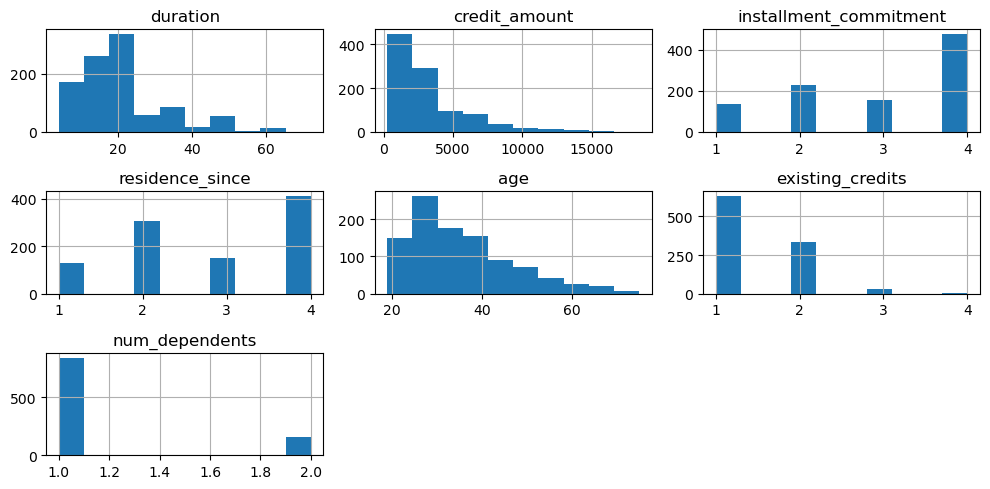

In [5]:
# distribution of data
fig,ax=plt.subplots(figsize=(10,5))
data.hist(ax=ax)
plt.tight_layout()
plt.show()

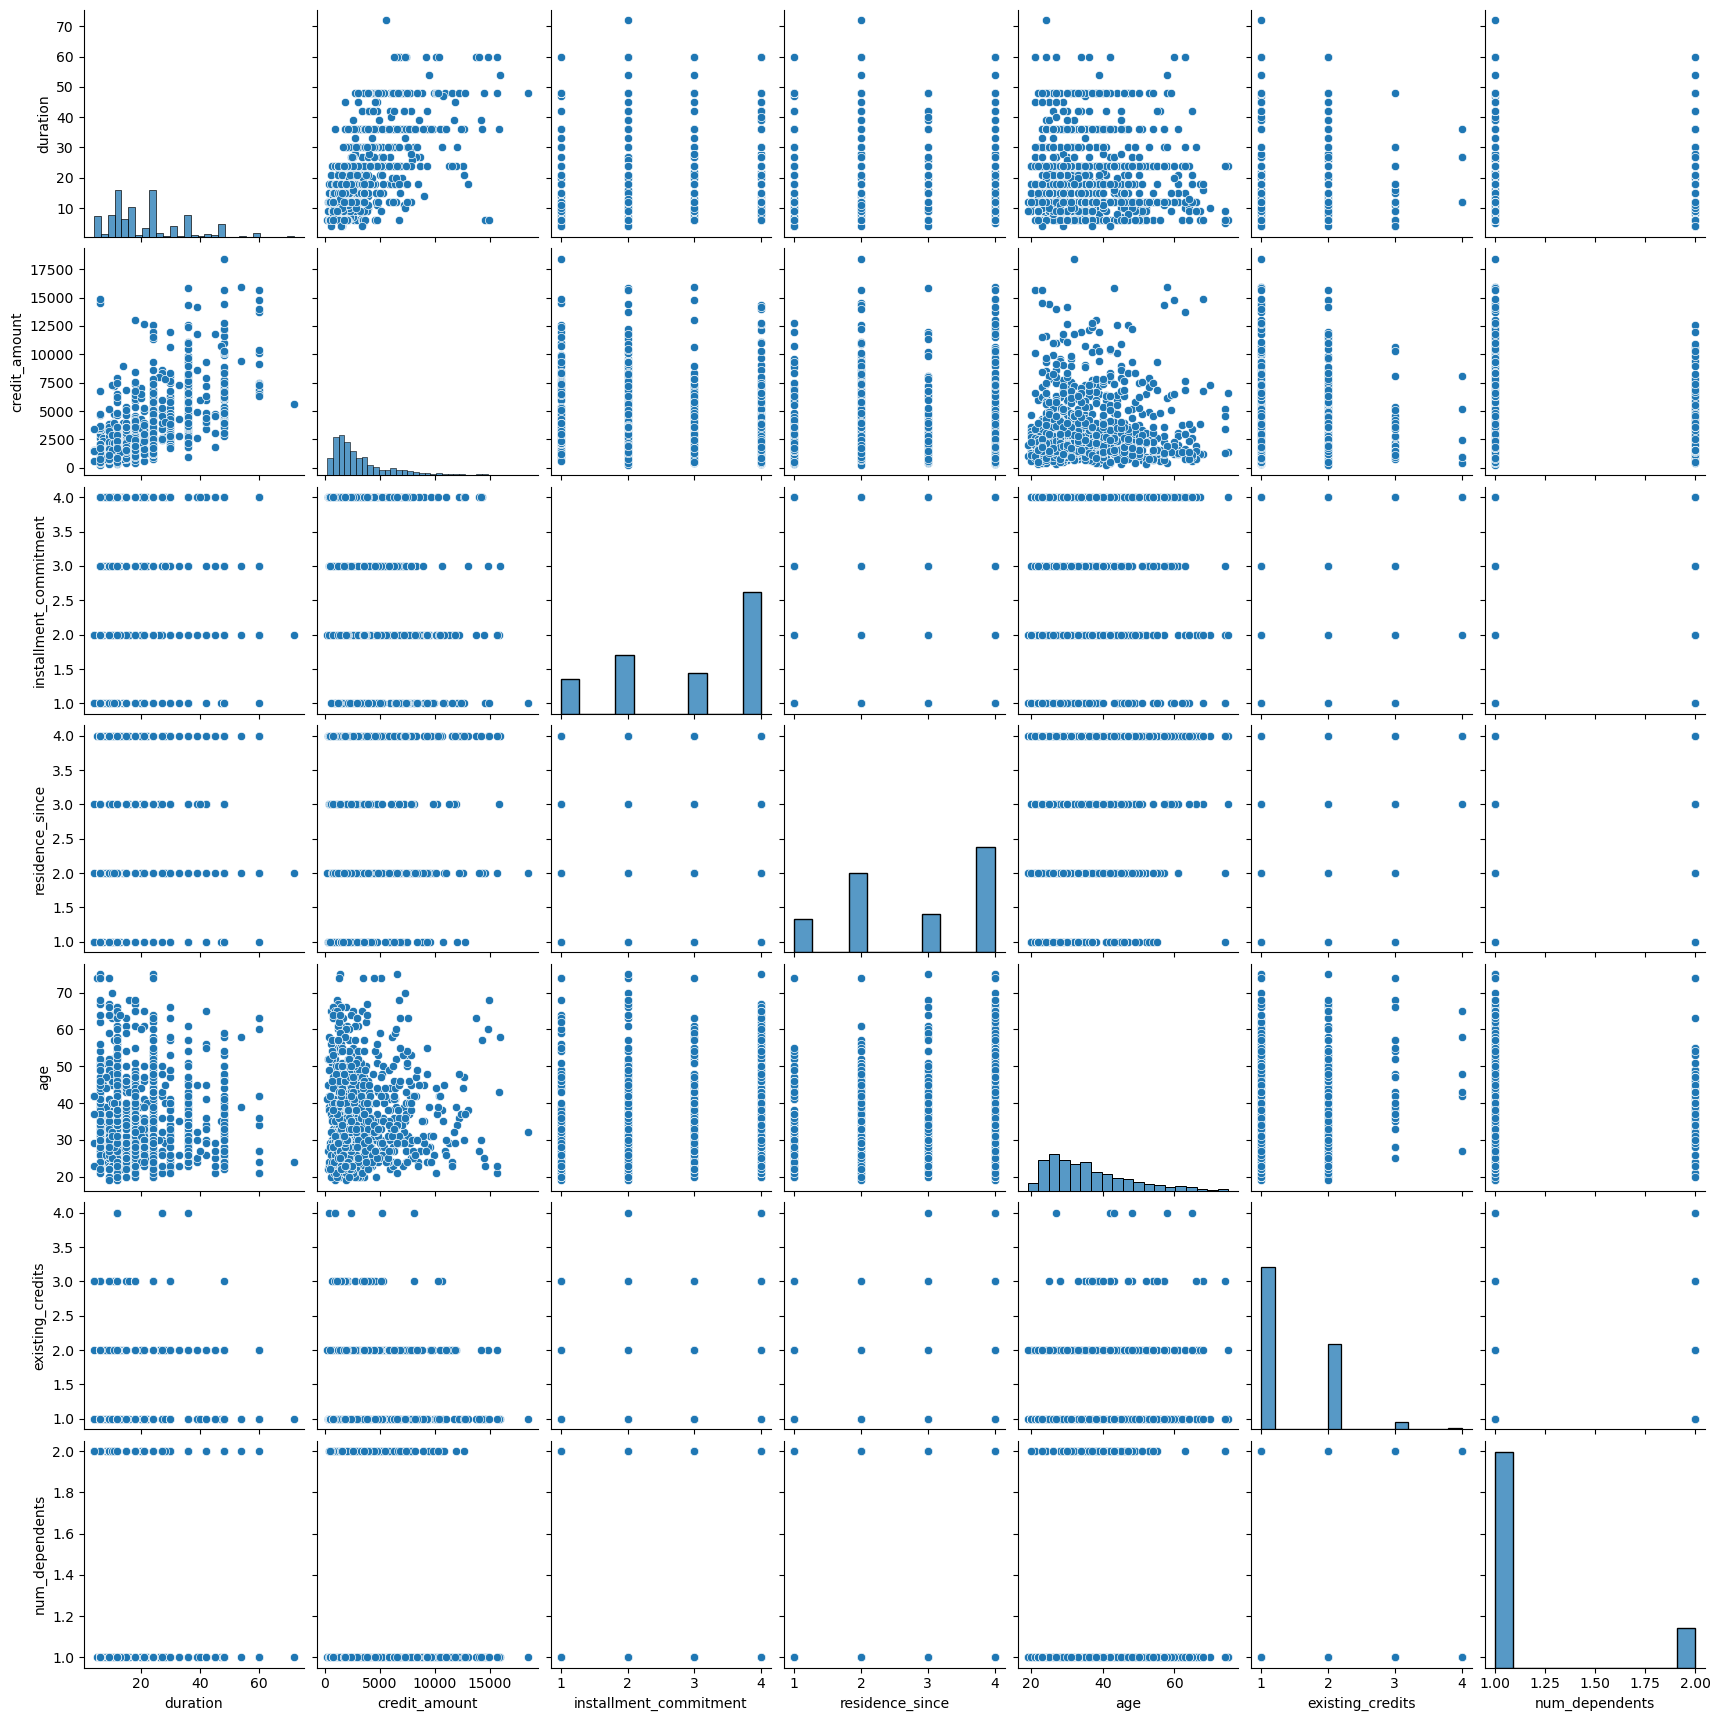

In [6]:
sns.pairplot(data)

In [7]:
# check missing values
data.isnull().sum()

checking_status           91
duration                   0
credit_history            39
purpose                   43
credit_amount              0
savings_status            13
employment                13
installment_commitment     0
personal_status            0
other_parties              0
residence_since            0
property_magnitude        58
age                        0
other_payment_plans        0
housing                   69
existing_credits           0
job                        0
num_dependents             0
own_telephone              0
foreign_worker             0
class                      0
dtype: int64

In [8]:
# fill all categorical data with mode
cat_col=data.select_dtypes(include=[object]).columns
for col in cat_col:
    data[col]=data[col].fillna(data[col].mode()[0])

In [9]:
data.isnull().sum()

checking_status           0
duration                  0
credit_history            0
purpose                   0
credit_amount             0
savings_status            0
employment                0
installment_commitment    0
personal_status           0
other_parties             0
residence_since           0
property_magnitude        0
age                       0
other_payment_plans       0
housing                   0
existing_credits          0
job                       0
num_dependents            0
own_telephone             0
foreign_worker            0
class                     0
dtype: int64

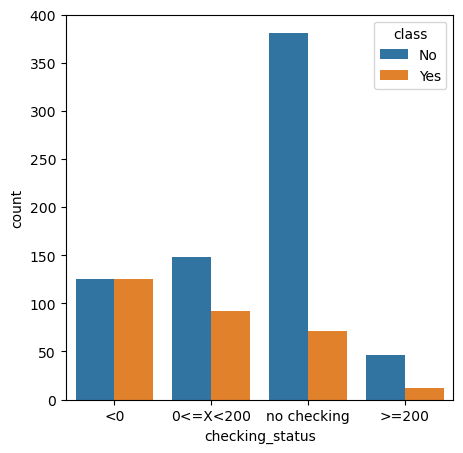

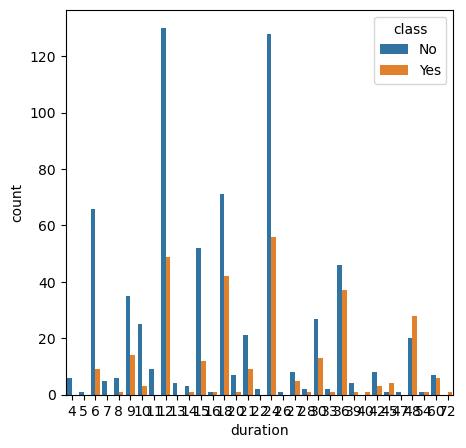

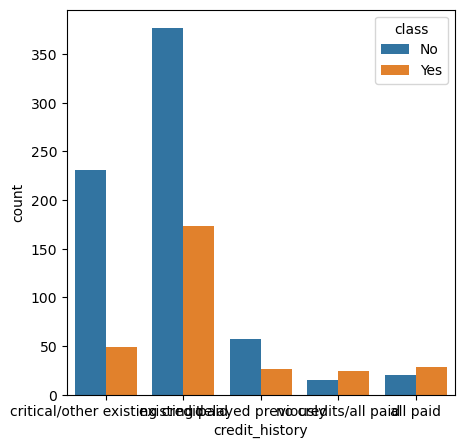

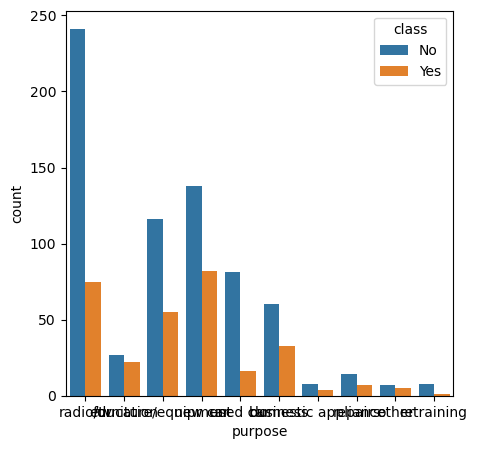

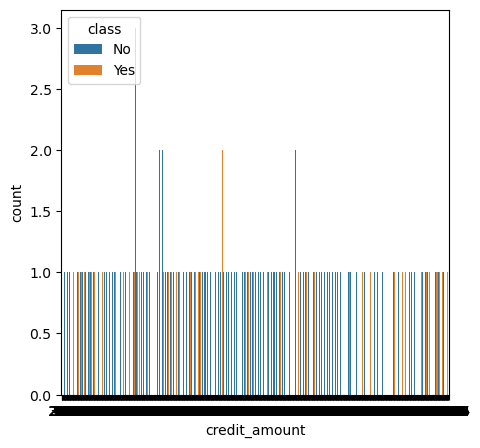

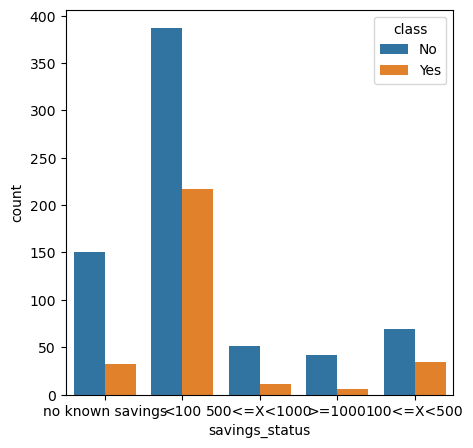

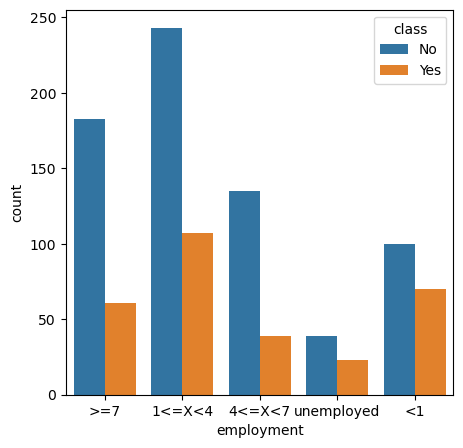

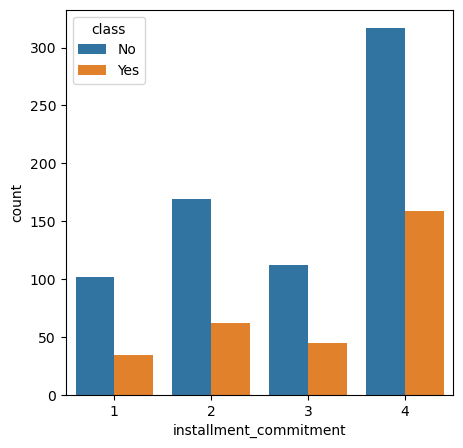

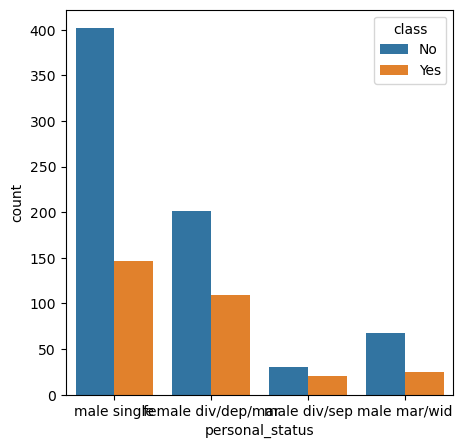

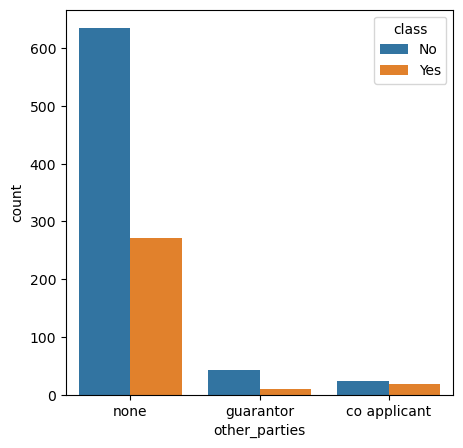

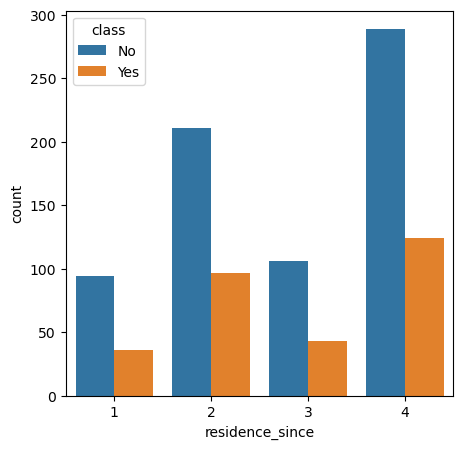

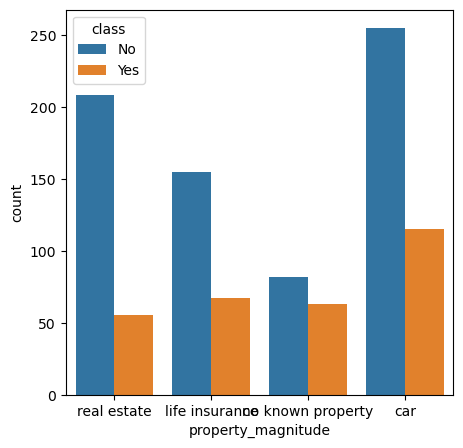

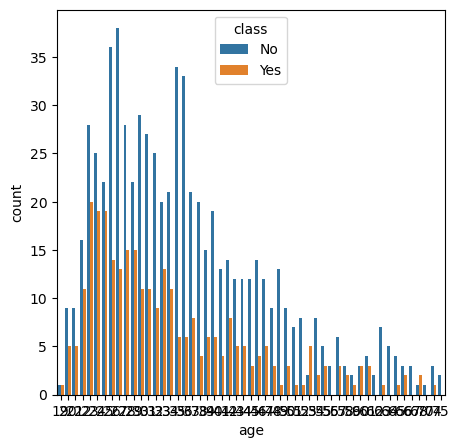

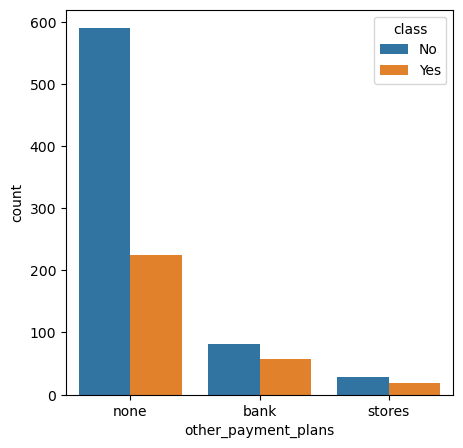

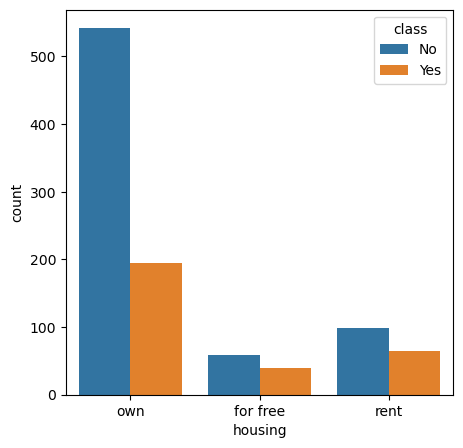

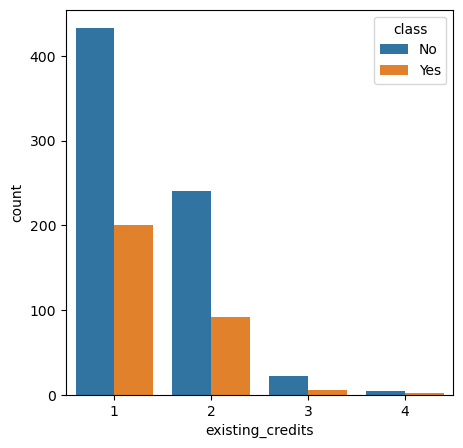

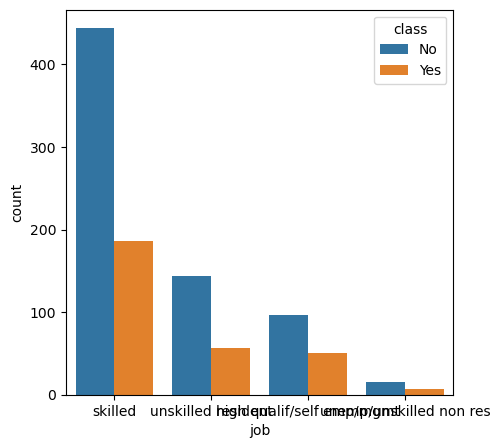

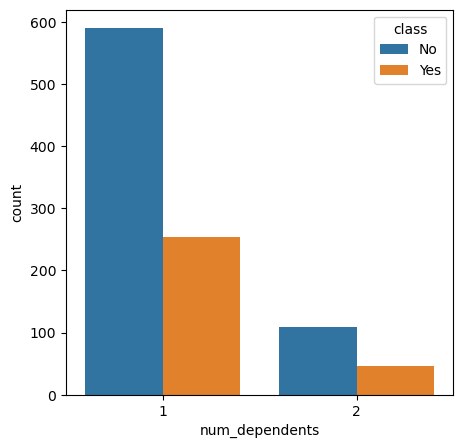

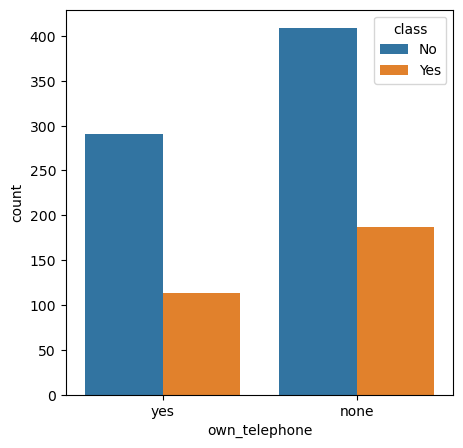

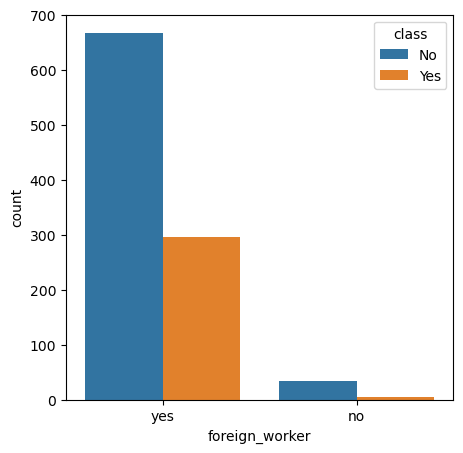

In [10]:
columns = (data.columns).drop("class")
for feature in columns:
    plt.figure(figsize=(5, 5))
    sns.countplot(data=data, x=feature, hue="class")
    plt.legend(title="class", labels=["No", "Yes"])
    plt.show()

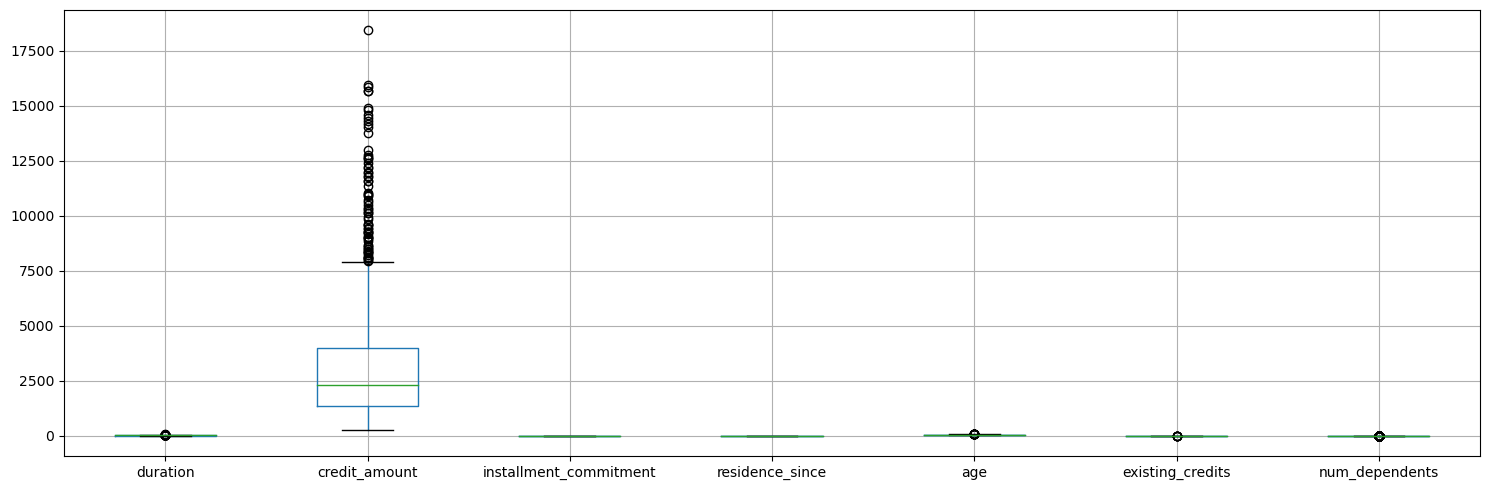

In [11]:
# check outliers using boxplot
fig,ax=plt.subplots(figsize=(15,5))
data.boxplot(ax=ax)
plt.tight_layout()
plt.show()

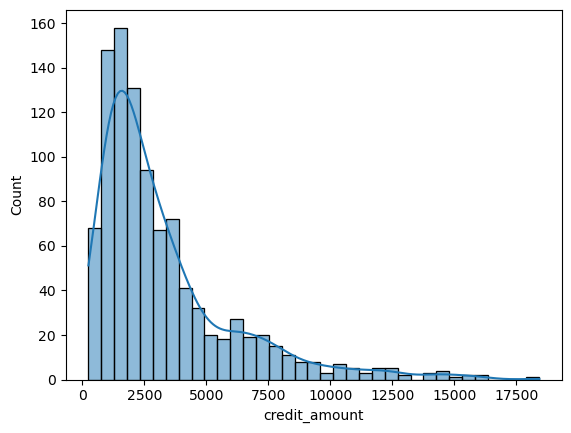

In [12]:
sns.histplot(x=data["credit_amount"],kde=True)
plt.show()

# from this boxplot we have outliers in credit amount column

In [13]:
ind=data[(data["credit_amount"]>5000)&(data["credit_amount"]<5500)].index
ind

Int64Index([  9,  65, 148, 186, 202, 212, 262, 310, 444, 477, 501, 557, 572,
            676, 683, 705, 748, 760, 833, 840],
           dtype='int64')

In [14]:
specific_point=data["credit_amount"][9] # i will use this point to get it's z_score and use it as a theshold value
specific_point

5234

In [15]:
specific_z = (specific_point - data['credit_amount'].mean()) / data['credit_amount'].std()
specific_z

0.6953329645123847

In [16]:
from scipy.stats import zscore
threshold = specific_z  
z_scores = zscore(data['credit_amount'])
outliers_mask = abs(z_scores) > threshold

# Remove rows with outliers
df_no_outliers = data[~outliers_mask]

In [17]:
df_no_outliers

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
2,no checking,12,critical/other existing credit,education,2096,<100,4<=X<7,2,male single,none,...,real estate,49,none,own,1,unskilled resident,2,none,yes,good
4,<0,24,delayed previously,new car,4870,<100,1<=X<4,3,male single,none,...,no known property,53,none,for free,2,skilled,2,none,yes,bad
6,no checking,24,existing paid,furniture/equipment,2835,500<=X<1000,>=7,3,male single,none,...,life insurance,53,none,own,1,skilled,1,none,yes,good
8,no checking,12,existing paid,radio/tv,3059,>=1000,4<=X<7,2,male div/sep,none,...,real estate,61,none,own,1,unskilled resident,1,none,yes,good
11,<0,48,existing paid,business,4308,<100,<1,3,female div/dep/mar,none,...,life insurance,24,none,rent,1,skilled,1,none,yes,bad
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,no checking,12,existing paid,radio/tv,2390,no known savings,>=7,4,male single,none,...,car,50,none,own,1,skilled,1,yes,yes,good
995,no checking,12,existing paid,radio/tv,1736,<100,4<=X<7,3,female div/dep/mar,none,...,real estate,31,none,own,1,unskilled resident,1,none,yes,good
996,<0,30,existing paid,used car,3857,<100,1<=X<4,4,male div/sep,none,...,life insurance,40,none,own,1,high qualif/self emp/mgmt,1,yes,yes,good
998,<0,45,existing paid,radio/tv,1845,<100,1<=X<4,4,male single,none,...,no known property,23,none,for free,1,skilled,1,yes,yes,bad


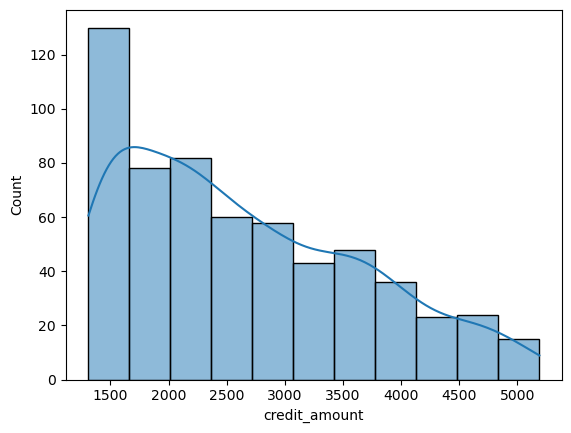

In [18]:
sns.histplot(x=df_no_outliers["credit_amount"],kde=True)
plt.show()

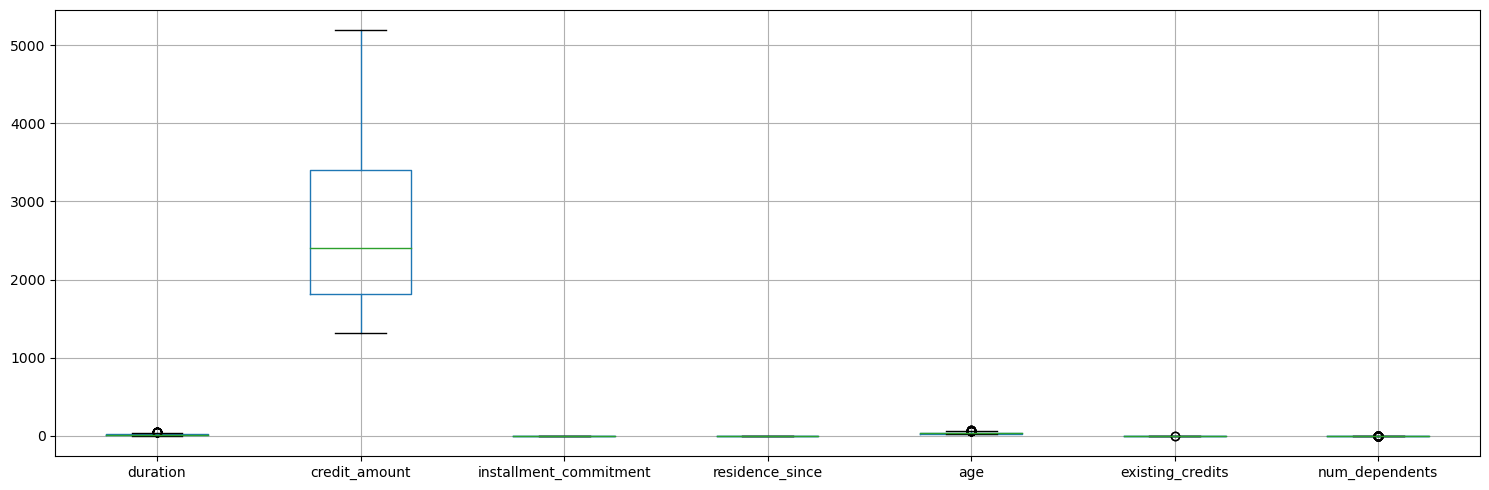

In [19]:
fig,ax=plt.subplots(figsize=(15,5))
df_no_outliers.boxplot(ax=ax)
plt.tight_layout()
plt.show()

In [20]:
df_no_outliers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 597 entries, 2 to 999
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   checking_status         597 non-null    object
 1   duration                597 non-null    int64 
 2   credit_history          597 non-null    object
 3   purpose                 597 non-null    object
 4   credit_amount           597 non-null    int64 
 5   savings_status          597 non-null    object
 6   employment              597 non-null    object
 7   installment_commitment  597 non-null    int64 
 8   personal_status         597 non-null    object
 9   other_parties           597 non-null    object
 10  residence_since         597 non-null    int64 
 11  property_magnitude      597 non-null    object
 12  age                     597 non-null    int64 
 13  other_payment_plans     597 non-null    object
 14  housing                 597 non-null    object
 15  existi

In [21]:
# convert categorical data to nummeric
labelen=LabelEncoder()
for col in cat_col:
    df_no_outliers[col]=labelen.fit_transform(df_no_outliers[col])

C:\Users\CEC\AppData\Local\Temp\ipykernel_15232\2547685911.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_outliers[col]=labelen.fit_transform(df_no_outliers[col])
C:\Users\CEC\AppData\Local\Temp\ipykernel_15232\2547685911.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_outliers[col]=labelen.fit_transform(df_no_outliers[col])
C:\Users\CEC\AppData\Local\Temp\ipykernel_15232\2547685911.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usi

In [22]:
# correlation to check how features affect the target
df_no_outliers.corr()["class"].sort_values()

duration                 -0.250167
foreign_worker           -0.096101
installment_commitment   -0.095958
credit_amount            -0.083497
credit_history           -0.079415
housing                  -0.034048
residence_since          -0.001234
existing_credits          0.003639
num_dependents            0.013919
job                       0.014758
employment                0.016082
property_magnitude        0.034708
other_parties             0.038451
other_payment_plans       0.039747
own_telephone             0.059798
personal_status           0.074714
savings_status            0.086685
age                       0.127309
purpose                   0.145440
checking_status           0.214551
class                     1.000000
Name: class, dtype: float64

In [23]:
#drop columns with law correlation with target
df_no_outliers=df_no_outliers.drop(['duration', 'credit_amount', 'credit_history', 'foreign_worker',
       'installment_commitment', 'housing', 'employment', 'residence_since',
       'num_dependents', 'other_parties'],axis=1)

In [24]:
df_no_outliers

,checking_status,purpose,savings_status,personal_status,property_magnitude,age,other_payment_plans,existing_credits,job,own_telephone,class
2,3,2,2,3,3,49,1,1,3,0,1
4,1,4,2,3,2,53,1,2,1,0,0
6,3,3,1,3,1,53,1,1,1,0,1
8,3,6,3,1,3,61,1,1,3,0,1
11,1,0,2,0,1,24,1,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
994,3,6,4,3,0,50,1,1,1,1,1
995,3,6,2,0,3,31,1,1,3,0,1
996,1,9,2,1,1,40,1,1,0,1,1
998,1,6,2,3,2,23,1,1,1,1,0


In [25]:
# check duplicates
df_no_outliers.duplicated().sum()

8

In [26]:
df_no_outliers.drop_duplicates()


,checking_status,purpose,savings_status,personal_status,property_magnitude,age,other_payment_plans,existing_credits,job,own_telephone,class
2,3,2,2,3,3,49,1,1,3,0,1
4,1,4,2,3,2,53,1,2,1,0,0
6,3,3,1,3,1,53,1,1,1,0,1
8,3,6,3,1,3,61,1,1,3,0,1
11,1,0,2,0,1,24,1,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
994,3,6,4,3,0,50,1,1,1,1,1
995,3,6,2,0,3,31,1,1,3,0,1
996,1,9,2,1,1,40,1,1,0,1,1
998,1,6,2,3,2,23,1,1,1,1,0


In [27]:
# split data to features and target
feature=df_no_outliers.drop("class",axis=1)
target=df_no_outliers["class"]

In [28]:
target.value_counts()

1    441
0    156
Name: class, dtype: int64

we have inbalance problem i will use SMOTE for oversampling because of the size of data

In [29]:
SM=SMOTE()
X_SM_sampled,y_SM_sampled=SM.fit_resample(feature,target)

In [30]:
X_SM_sampled.shape,y_SM_sampled.shape

((882, 10), (882,))

In [31]:
y_SM_sampled.value_counts()

1    441
0    441
Name: class, dtype: int64

In [32]:
# split data to train and test for scaling
x_train,x_test,y_train,y_test=train_test_split(X_SM_sampled,y_SM_sampled,test_size=0.2,random_state=0)

In [33]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((705, 10), (177, 10), (705,), (177,))

In [34]:
from sklearn.feature_selection import SelectKBest,chi2

chi2_selector=SelectKBest(chi2,k=7)  #either chi2 or info gain 
Xtrain_selected=chi2_selector.fit_transform(x_train,y_train)
Xtest_selected=chi2_selector.transform(x_test)


In [35]:
index=chi2_selector.get_support(indices=True)

In [36]:
df_no_outliers.columns[index]

Index(['checking_status', 'purpose', 'personal_status', 'property_magnitude',
       'age', 'other_payment_plans', 'own_telephone'],
      dtype='object')

In [39]:
STSC=StandardScaler()
x_train_scaled=STSC.fit_transform(Xtrain_selected)
x_test_scaled=STSC.transform(Xtest_selected)

In [40]:
x_train_scaled.shape

(705, 7)

In [41]:
x_test_scaled.shape

(177, 7)

In [42]:
LR=LogisticRegression()
LR.fit(x_train_scaled,y_train)

LogisticRegression()

In [43]:
yprd=LR.predict(x_test_scaled)

In [44]:
log_accuracy = round (accuracy_score(yprd,y_test)*100,2)
print(log_accuracy ,"%")

69.49 %


In [45]:
LR.score(x_train_scaled,y_train)

0.7262411347517731

In [46]:
rfc=RandomForestClassifier(n_estimators=100,criterion="gini",max_depth=5)
rfc.fit(x_train_scaled,y_train)

RandomForestClassifier(max_depth=5)

In [47]:
yprd_rfc=rfc.predict(x_test_scaled)

In [48]:
rfc_accuracy = round (accuracy_score(yprd_rfc,y_test)*100,2)
print(rfc_accuracy ,"%")

72.88 %


In [49]:
rfc.score(x_train_scaled,y_train)

0.8028368794326242

In [50]:
svc=SVC(kernel="rbf")
svc.fit(x_train_scaled,y_train)


SVC()

In [51]:
yprd_svc=svc.predict(x_test_scaled)

In [52]:
svc_accuracy = round (accuracy_score(yprd_svc,y_test)*100,2)
print(svc_accuracy ,"%")

74.01 %


In [53]:
svc.score(x_train_scaled,y_train)

0.8085106382978723